<a href="https://colab.research.google.com/github/Dmitry-365/1/blob/main/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F_%D0%92%D0%A0%D0%9F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Модель

In [ ]:
# для работы с данными
import pandas as pd
import numpy as np

# быстрый вызов эконометрических команд
import statsmodels.api as sms
import statsmodels.formula.api as smf

import scipy.stats as stats
import statsmodels.stats.diagnostic as sm_diagnostic
import statsmodels.stats.stattools as sm_tools
import statsmodels.stats.outliers_influence as oi

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# саммари-таблички
!pip install stargazer
from stargazer.stargazer import Stargazer, LineLocation

# исключительно для датасета
!pip install linearmodels

# все для рисования
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
%matplotlib inline

# убрать предупреждения
import warnings
warnings.filterwarnings("ignore")

# ну куда ж без него
!pip install seaborn
import seaborn as sb


In [ ]:
# ВРП- Валовой региональ- ный продукт в 2019 г. , млрд руб
# ИОК-инвестиции в основной капитал (в фактически действовавших ценах; миллионов рублей)
# ОРТ- оборот розничной торговли (в фактически действовавших ценах; рублей)
# СЧН-СРЕДНЕГОДОВАЯ ЧИСЛЕННОСТЬ НАСЕЛЕНИЯ (оценка; тысяч человек)
# УЗН-уровень занятости населения (по данным выборочных обследований рабочей силы; в процентах)
# НИОКР-ВНУТРЕННИЕ ЗАТРАТЫ НА НАУЧНЫЕ ИССЛЕДОВАНИЯ И РАЗРАБОТКИ
# РДН- РЕАЛЬНЫЕ ДЕНЕЖНЫЕ ДОХОДЫ НАСЕЛЕНИЯ (в процентах к предыдущему году)
# Н-ПОСТУПЛЕНИЕ НАЛОГОВ, СБОРОВ И ИНЫХ ОБЯЗАТЕЛЬНЫХ ПЛАТЕЖЕЙ (миллионов)
# ВСМ-СПЕЦИАЛИСТОВ, МАГИСТРОВ (человек) всего
# ГАТ	-ПЕРЕВОЗКИ ГРУЗОВ И ГРУЗООБОРОТ АВТОМОБИЛЬНОГО ТРАНСПОРТА
# ОВНИР	-ОРГАНИЗАЦИИ, ВЫПОЛНЯВШИЕ НАУЧНЫЕ ИССЛЕДОВАНИЯ И РАЗРАБОТКИ
# ЭЗСНГ-суммарное количество объема экспорта в страны зарубежья и СНГ
# ОРС- ОБЪЕМ РАБОТ, ВЫПОЛНЕННЫХ ПО ВИДУ ЭКОНОМИЧЕСКОЙ ДЕЯТЕЛЬНОСТИ «СТРОИТЕЛЬСТВО» (в фактически действовавших ценах; миллионов рублей)
# ФКП-ФАКТИЧЕСКОЕ КОНЕЧНОЕ потреблениеНА ТЕРРИТОРИИ СУБЪЕКТОВ (в текущих рыночных ценах; расходы домохозяйств , социальных трансфертов в
# ВС-ВЫПУСК СПЕЦИАЛИСТОВ (тысяч)
# ОГЖ-ОТПРАВЛЕНИЕ ГРУЗОВ ЖЕЛЕЗНОДОРОЖНЫМ ТРАНСПОРТОМ ОБЩЕГО ПОЛЬЗОВАНИЯ
# ЗК-ЗАБОЛЕВАЕМОСТЬ на 1000 человек населения ПО ОСНОВНЫМ КЛАССАМ (болезни имунной системы (нарушение кровообращения))
# ВРПД-Валовой региональ- ный продукт на душу населения
# ЧСПБС-2019/2020 Студенты органи- заций – всего 5.15. ЧИСЛЕННОСТЬ СТУДЕНТОВ, ОБУЧАЮЩИХСЯ ПО ПРОГРАММАМ БАКАЛАВРИАТА, СПЕЦИАЛИТЕТА, МАГИСТРАТУРЫ
# (на начало учебного года; тысяч человек)
# ПОПБС-ПРИЕМ НА ОБУЧЕНИЕ ПО ПРОГРАММАМ БАКАЛАВРИАТА, СПЕЦИАЛИТЕТА, (тысяч Принято на обу- чение
# в организации – всего человек) МАГИСТРАТУРЫ
# СДДНМ-. СРЕДНЕДУШЕВЫЕ ДЕНЕЖНЫЕ ДОХОДЫ НАСЕЛЕНИЯ(в месяц; рублей)
# РР-РАСПРЕДЕЛЕНИЕ СТРОИТЕЛЬНЫХ РАБОТ, ВЫПОЛНЕННЫХ ОРГАНИЗАЦИЯМИ (в процентах) РАЗЛИЧНЫХ ФОРМ СОБСТВЕННОСТИ  частнаяская
# СИОКЗ-СТРУКТУРА ИНВЕСТИЦИЙ В ОСНОВНОЙ КАПИТАЛ ПО ВИДАМ ОСНОВНЫХ  ФОНДОВ (в процентах от общего объема инвестиций) 2019 З дания  (кроме жилых) и сооружения, расходы
# ВЮФЛ- ВКЛАДЫ (ДЕПОЗИТЫ) ЮРИДИЧЕСКИХ И ФИЗИЧЕСКИХ ЛИЦ В РУБЛЯХ,  (исходя из места привлечения средств; на начало года; миллионов рублей) ПРИВЛЕЧЕННЫЕ КРЕДИТНЫМИ ОРГАНИЗАЦИЯМИ
# ИППТ- ИСПОЛЬЗУЕМЫЕ ПЕРЕДОВЫЕ ПРОИЗВОДСТВЕННЫЕ ТЕХНОЛОГИИ
# ЗИДО-ЗАТРАТЫ НА ИННОВАЦИОННУЮ ДЕЯТЕЛЬНОСТЬ ОРГАНИЗАЦИЙ в 2019 г. Млн руб.
# NX-ТОВАРНАЯ СТРУКТУРА ЭКСПОРТА И ИМПОРТА в 2019 г. Чистый экспорт
# ИТГП-ИНДЕКСЫ ТАРИФОВ НА ГРУЗОВЫЕ ПЕРЕВОЗКИ (декабрь к декабрю предыдущего года; в процентах)
# ЖФ- ЖИЛИЩНЫЙ ФОНД1) (общая площадь жилых помещений; миллионов
# ЧПО-ЧИСЛО ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ1)(на конец года)
# ООЭД-ОБОРОТ ОРГАНИЗАЦИЙ ПО ВИДАМ ЭКОНОМИЧЕСКОЙ ДЕЯТЕЛЬНОСТИ в 2019 г. 1) (миллиардов рублей) обрабатыва ющие производств а
# ОКУ-ОБЪЕМ КОММУНАЛЬНЫХ УСЛУГ НАСЕЛЕНИЮ (миллионов рублей)



In [ ]:
data = pd.read_excel("/content/эконометрика данные 18.12.23 конечный вариант.xlsx")
data.head()

NameError: name 'pd' is not defined

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data['СДДНМ2']=np.log(data['СДДНМ'])
data.head()
data['ОКУ2']=np.log(data['ОКУ'])
data.head()
Y=data['ВРП']
X=data[['ГАТ','ОКУ','ОГЖ','РДН']]
model0=sm.OLS(Y,sm.add_constant(X)).fit()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:                    ВРП   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     63.73
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           4.20e-24
Time:                        14:37:29   Log-Likelihood:                -716.49
No. Observations:                  85   AIC:                             1443.
Df Residuals:                      80   BIC:                             1455.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.096e+04   8528.115     -2.458      0.0

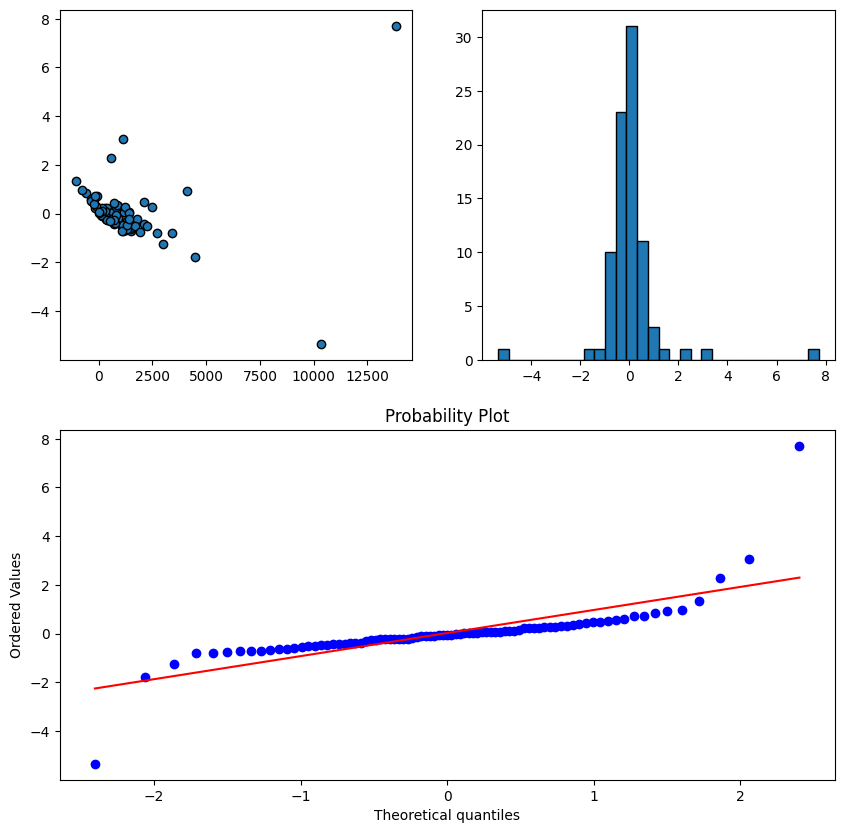

In [ ]:
# для линейной модели
fig = plt.figure(num = 2, figsize = (10, 10))

# Графически ищем гетероскедастичность:
influence = model0.get_influence()
st_residuals_lin = influence.resid_studentized_internal

# Диаграмма рассеяния остатков относительно
ax = fig.add_subplot(2, 2, 1)
ax.plot(model0.fittedvalues, st_residuals_lin, linestyle = "None", marker = "o", markeredgecolor = "black")
# Гистограмма остатков
ax = fig.add_subplot(2, 2, 2)
ax.hist(st_residuals_lin, bins = 30, edgecolor = "black")
# График остатков: Q-Q:
ax = fig.add_subplot(2, 1, 2)
stats.probplot(st_residuals_lin, dist = "norm", plot = ax)

plt.show()

In [ ]:
# H0: гомоскедастичность
name = ['LM statistic', 'LM p-value', 'F-value', 'F  p-value']
bp_test = sm_diagnostic.het_breuschpagan(resid = model0.resid, exog_het = sm.add_constant(X))
print(pd.DataFrame([np.round(bp_test, 3)], columns=name))

   LM statistic  LM p-value  F-value  F  p-value
0        63.105         0.0   57.644         0.0


In [ ]:
# H0: нормальность остатков
norm_tests = ["Anderson-Darling",
              "Kolmogorov-Smirnov",
              "Jarque-Bera"]

In [ ]:
norm_test = pd.DataFrame()
norm_test["p_value"] = [
    sm_diagnostic.normal_ad(x = model0.resid)[1],
    sm_diagnostic.kstest_normal(x = model0.resid, dist = "norm")[1],
    sm_tools.jarque_bera(model0.resid)[1]
]
norm_test["Test"] = norm_tests
print(norm_test)

         p_value                Test
0   6.029346e-15    Anderson-Darling
1   1.000000e-03  Kolmogorov-Smirnov
2  1.159195e-142         Jarque-Bera


In [ ]:
#VIF-тест
pd.Series([vif(X.values, i) for i in range(X.shape[1])], index=X.columns)

ГАТ    4.197310
ОКУ    3.308876
ОГЖ    1.061374
РДН    2.087249
dtype: float64

In [ ]:
#Тест Бройша-Пагана.(определение гетероскедостичности/гомоскедостичности) ,H0->гомоскедостичность,
#H1-> гомоскедостичность отсутствует.=> гетероскедостичность.
#если p > 0,05 , то H0 не отвергаем
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
test = sms.het_breuschpagan(resid=model0.resid,exog_het=sm.add_constant(X))
names= ['Lagrange multiplier statistic','p-value','f-value ','f p-value']
lzip(names,test)
#1.Lagrange multiplier statistic
#2.p-value
#3.f-vulue
#4.f p-value

[('Lagrange multiplier statistic', 63.10520170068436),
 ('p-value', 6.44859725479794e-13),
 ('f-value ', 57.644012827153404),
 ('f p-value', 8.394033669602432e-23)]

In [ ]:
#Тестирование на пропущенную нелинейность(Тест Рейнбоу)
data_rain = data.iloc[np.argsort(data["ГАТ"]), :]
factors_rain = data_rain[['ГАТ','ОКУ','ОГЖ','РДН']]
wage_rain = data_rain['ВРП']

res_rain = sm.OLS(wage_rain, factors_rain).fit()
rain_t1 = sm_diagnostic.linear_rainbow(res_rain)
print(pd.DataFrame(rain_t1, index = ["F-stat", "p-value"]).T)



      F-stat       p-value
0  11.166081  6.014400e-12


In [ ]:
#Тестирование на пропущенную нелинейность
factors_nosq = data[['ГАТ','ОКУ','ОГЖ']]

wage = data['ВРП']
res_nosq = sm.OLS(wage, factors_nosq).fit()

reset_t2 = oi.reset_ramsey(res_nosq, degree = 2)
print(reset_t2)


<F test: F=42.198948702535105, p=6.216372227303423e-09, df_denom=81, df_num=1>


# 2 Модель

In [ ]:
# ВРП- Валовой региональ- ный продукт в 2019 г. , млрд руб
# ИОК-инвестиции в основной капитал (в фактически действовавших ценах; миллионов рублей)
# ОРТ- оборот розничной торговли (в фактически действовавших ценах; рублей)
# СЧН-СРЕДНЕГОДОВАЯ ЧИСЛЕННОСТЬ НАСЕЛЕНИЯ (оценка; тысяч человек)
# УЗН-уровень занятости населения (по данным выборочных обследований рабочей силы; в процентах)
# НИОКР-ВНУТРЕННИЕ ЗАТРАТЫ НА НАУЧНЫЕ ИССЛЕДОВАНИЯ И РАЗРАБОТКИ
# РДН- РЕАЛЬНЫЕ ДЕНЕЖНЫЕ ДОХОДЫ НАСЕЛЕНИЯ (в процентах к предыдущему году)
# Н-ПОСТУПЛЕНИЕ НАЛОГОВ, СБОРОВ И ИНЫХ ОБЯЗАТЕЛЬНЫХ ПЛАТЕЖЕЙ (миллионов)
# ВСМ-СПЕЦИАЛИСТОВ, МАГИСТРОВ (человек) всего
# ГАТ	-ПЕРЕВОЗКИ ГРУЗОВ И ГРУЗООБОРОТ АВТОМОБИЛЬНОГО ТРАНСПОРТА
# ОВНИР	-ОРГАНИЗАЦИИ, ВЫПОЛНЯВШИЕ НАУЧНЫЕ ИССЛЕДОВАНИЯ И РАЗРАБОТКИ
# ЭЗСНГ-суммарное количество объема экспорта в страны зарубежья и СНГ
# ОРС- ОБЪЕМ РАБОТ, ВЫПОЛНЕННЫХ ПО ВИДУ ЭКОНОМИЧЕСКОЙ ДЕЯТЕЛЬНОСТИ «СТРОИТЕЛЬСТВО» (в фактически действовавших ценах; миллионов рублей)
# ФКП-ФАКТИЧЕСКОЕ КОНЕЧНОЕ потреблениеНА ТЕРРИТОРИИ СУБЪЕКТОВ (в текущих рыночных ценах; расходы домохозяйств , социальных трансфертов в
# ВС-ВЫПУСК СПЕЦИАЛИСТОВ (тысяч)
# ОГЖ-ОТПРАВЛЕНИЕ ГРУЗОВ ЖЕЛЕЗНОДОРОЖНЫМ ТРАНСПОРТОМ ОБЩЕГО ПОЛЬЗОВАНИЯ
# ЗК-ЗАБОЛЕВАЕМОСТЬ на 1000 человек населения ПО ОСНОВНЫМ КЛАССАМ (болезни имунной системы (нарушение кровообращения))
# ВРПД-Валовой региональ- ный продукт на душу населения
# ЧСПБС-2019/2020 Студенты органи- заций – всего 5.15. ЧИСЛЕННОСТЬ СТУДЕНТОВ, ОБУЧАЮЩИХСЯ ПО ПРОГРАММАМ БАКАЛАВРИАТА, СПЕЦИАЛИТЕТА, МАГИСТРАТУРЫ
# (на начало учебного года; тысяч человек)
# ПОПБС-ПРИЕМ НА ОБУЧЕНИЕ ПО ПРОГРАММАМ БАКАЛАВРИАТА, СПЕЦИАЛИТЕТА, (тысяч Принято на обу- чение
# в организации – всего человек) МАГИСТРАТУРЫ
# СДДНМ-. СРЕДНЕДУШЕВЫЕ ДЕНЕЖНЫЕ ДОХОДЫ НАСЕЛЕНИЯ(в месяц; рублей)
# РР-РАСПРЕДЕЛЕНИЕ СТРОИТЕЛЬНЫХ РАБОТ, ВЫПОЛНЕННЫХ ОРГАНИЗАЦИЯМИ (в процентах) РАЗЛИЧНЫХ ФОРМ СОБСТВЕННОСТИ  частнаяская
# СИОКЗ-СТРУКТУРА ИНВЕСТИЦИЙ В ОСНОВНОЙ КАПИТАЛ ПО ВИДАМ ОСНОВНЫХ  ФОНДОВ (в процентах от общего объема инвестиций) 2019 З дания  (кроме жилых) и сооружения, расходы
# ВЮФЛ- ВКЛАДЫ (ДЕПОЗИТЫ) ЮРИДИЧЕСКИХ И ФИЗИЧЕСКИХ ЛИЦ В РУБЛЯХ,  (исходя из места привлечения средств; на начало года; миллионов рублей) ПРИВЛЕЧЕННЫЕ КРЕДИТНЫМИ ОРГАНИЗАЦИЯМИ
# ИППТ- ИСПОЛЬЗУЕМЫЕ ПЕРЕДОВЫЕ ПРОИЗВОДСТВЕННЫЕ ТЕХНОЛОГИИ
# ЗИДО-ЗАТРАТЫ НА ИННОВАЦИОННУЮ ДЕЯТЕЛЬНОСТЬ ОРГАНИЗАЦИЙ в 2019 г. Млн руб.
# NX-ТОВАРНАЯ СТРУКТУРА ЭКСПОРТА И ИМПОРТА в 2019 г. Чистый экспорт
# ИТГП-ИНДЕКСЫ ТАРИФОВ НА ГРУЗОВЫЕ ПЕРЕВОЗКИ (декабрь к декабрю предыдущего года; в процентах)
# ЖФ- ЖИЛИЩНЫЙ ФОНД1) (общая площадь жилых помещений; миллионов
# ЧПО-ЧИСЛО ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ1)(на конец года)
# ООЭД-ОБОРОТ ОРГАНИЗАЦИЙ ПО ВИДАМ ЭКОНОМИЧЕСКОЙ ДЕЯТЕЛЬНОСТИ в 2019 г. 1) (миллиардов рублей) обрабатыва ющие производств а
# ОКУ-ОБЪЕМ КОММУНАЛЬНЫХ УСЛУГ НАСЕЛЕНИЮ (миллионов рублей)


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data['ВСМ2']=np.log(data['ВС'])
data.head()
data['ИОК2']=np.log(data['ИОК'])
data.head()
data['ЗИДО2']=np.log(data['ЗИДО'])
data.head()
Y=np.log(data['ВРП'])
X1=data[['ВСМ2','ИОК2','ЗИДО2']]
model1=sm.OLS(Y,sm.add_constant(X1)).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    ВРП   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     452.4
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           1.78e-50
Time:                        14:43:58   Log-Likelihood:                -5.2968
No. Observations:                  85   AIC:                             18.59
Df Residuals:                      81   BIC:                             28.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4108      0.430     -7.924      0.0

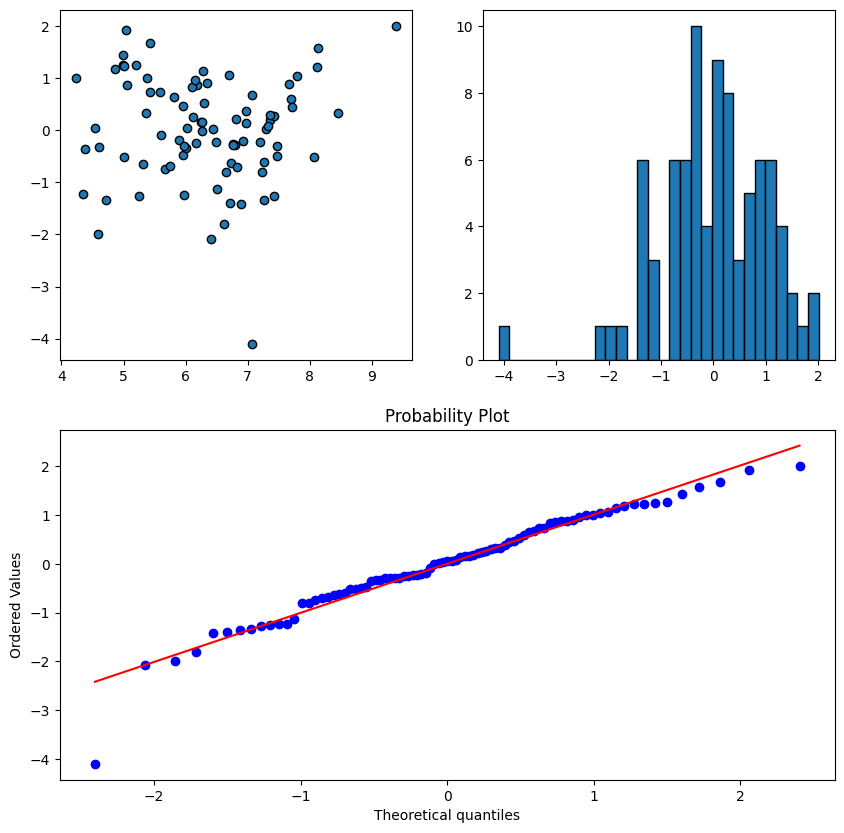

In [ ]:
# для модели 2
fig = plt.figure(num = 2, figsize = (10, 10))

# Графически ищем гетероскедастичность:
influence = model1.get_influence()
st_residuals_lin = influence.resid_studentized_internal

# Диаграмма рассеяния остатков относительно
ax = fig.add_subplot(2, 2, 1)
ax.plot(model1.fittedvalues, st_residuals_lin, linestyle = "None", marker = "o", markeredgecolor = "black")
# Гистограмма остатков
ax = fig.add_subplot(2, 2, 2)
ax.hist(st_residuals_lin, bins = 30, edgecolor = "black")
# График остатков: Q-Q:
ax = fig.add_subplot(2, 1, 2)
stats.probplot(st_residuals_lin, dist = "norm", plot = ax)

plt.show()

In [ ]:
# H0: гомоскедастичность
name = ['LM statistic', 'LM p-value', 'F-value', 'F  p-value']
bp_test = sm_diagnostic.het_breuschpagan(resid = model1.resid, exog_het = sm.add_constant(X1))
print(pd.DataFrame([np.round(bp_test, 3)], columns=name))

   LM statistic  LM p-value  F-value  F  p-value
0         6.856       0.077    2.369       0.077


In [ ]:
# H0: нормальность остатков
norm_tests = ["Anderson-Darling",
              "Kolmogorov-Smirnov",
              "Jarque-Bera"]
norm_test = pd.DataFrame()
norm_test["p_value"] = [
    sm_diagnostic.normal_ad(x = model1.resid)[1],
    sm_diagnostic.kstest_normal(x = model1.resid, dist = "norm")[1],
    sm_tools.jarque_bera(model1.resid)[1]
]
norm_test["Test"] = norm_tests
print(norm_test)

    p_value                Test
0  0.244416    Anderson-Darling
1  0.383687  Kolmogorov-Smirnov
2  0.000018         Jarque-Bera


In [ ]:
#VIF-тест
pd.Series([vif(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)

ВСМ2      5.032734
ИОК2     21.250625
ЗИДО2    27.255051
dtype: float64

In [ ]:
#Тест Бройша-Пагана.(определение гетероскедостичности/гомоскедостичности) ,H0->гомоскедостичность,
#H1-> гомоскедостичность отсутствует.=> гетероскедостичность.
#если p > 0,05 , то H0 не отвергаем
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
test = sms.het_breuschpagan(resid=model1.resid,exog_het=sm.add_constant(X1))
names= ['Lagrange multiplier statistic','p-value','f-value ','f p-value']
lzip(names,test)
#1.Lagrange multiplier statistic
#2.p-value
#3.f-vulue
#4.f p-value

[('Lagrange multiplier statistic', 6.855813269957252),
 ('p-value', 0.07663828719108386),
 ('f-value ', 2.368787315278067),
 ('f p-value', 0.0767241854077319)]

# 3 Модель

In [ ]:
# ВРП- Валовой региональ- ный продукт в 2019 г. , млрд руб
# ИОК-инвестиции в основной капитал (в фактически действовавших ценах; миллионов рублей)
# ОРТ- оборот розничной торговли (в фактически действовавших ценах; рублей)
# СЧН-СРЕДНЕГОДОВАЯ ЧИСЛЕННОСТЬ НАСЕЛЕНИЯ (оценка; тысяч человек)
# УЗН-уровень занятости населения (по данным выборочных обследований рабочей силы; в процентах)
# НИОКР-ВНУТРЕННИЕ ЗАТРАТЫ НА НАУЧНЫЕ ИССЛЕДОВАНИЯ И РАЗРАБОТКИ
# РДН- РЕАЛЬНЫЕ ДЕНЕЖНЫЕ ДОХОДЫ НАСЕЛЕНИЯ (в процентах к предыдущему году)
# Н-ПОСТУПЛЕНИЕ НАЛОГОВ, СБОРОВ И ИНЫХ ОБЯЗАТЕЛЬНЫХ ПЛАТЕЖЕЙ (миллионов)
# ВСМ-СПЕЦИАЛИСТОВ, МАГИСТРОВ (человек) всего
# ГАТ	-ПЕРЕВОЗКИ ГРУЗОВ И ГРУЗООБОРОТ АВТОМОБИЛЬНОГО ТРАНСПОРТА
# ОВНИР	-ОРГАНИЗАЦИИ, ВЫПОЛНЯВШИЕ НАУЧНЫЕ ИССЛЕДОВАНИЯ И РАЗРАБОТКИ
# ЭЗСНГ-суммарное количество объема экспорта в страны зарубежья и СНГ
# ОРС- ОБЪЕМ РАБОТ, ВЫПОЛНЕННЫХ ПО ВИДУ ЭКОНОМИЧЕСКОЙ ДЕЯТЕЛЬНОСТИ «СТРОИТЕЛЬСТВО» (в фактически действовавших ценах; миллионов рублей)
# ФКП-ФАКТИЧЕСКОЕ КОНЕЧНОЕ потреблениеНА ТЕРРИТОРИИ СУБЪЕКТОВ (в текущих рыночных ценах; расходы домохозяйств , социальных трансфертов в
# ВС-ВЫПУСК СПЕЦИАЛИСТОВ (тысяч)
# ОГЖ-ОТПРАВЛЕНИЕ ГРУЗОВ ЖЕЛЕЗНОДОРОЖНЫМ ТРАНСПОРТОМ ОБЩЕГО ПОЛЬЗОВАНИЯ
# ЗК-ЗАБОЛЕВАЕМОСТЬ на 1000 человек населения ПО ОСНОВНЫМ КЛАССАМ (болезни имунной системы (нарушение кровообращения))
# ВРПД-Валовой региональ- ный продукт на душу населения
# ЧСПБС-2019/2020 Студенты органи- заций – всего 5.15. ЧИСЛЕННОСТЬ СТУДЕНТОВ, ОБУЧАЮЩИХСЯ ПО ПРОГРАММАМ БАКАЛАВРИАТА, СПЕЦИАЛИТЕТА, МАГИСТРАТУРЫ
# (на начало учебного года; тысяч человек)
# ПОПБС-ПРИЕМ НА ОБУЧЕНИЕ ПО ПРОГРАММАМ БАКАЛАВРИАТА, СПЕЦИАЛИТЕТА, (тысяч Принято на обу- чение
# в организации – всего человек) МАГИСТРАТУРЫ
# СДДНМ-. СРЕДНЕДУШЕВЫЕ ДЕНЕЖНЫЕ ДОХОДЫ НАСЕЛЕНИЯ(в месяц; рублей)
# РР-РАСПРЕДЕЛЕНИЕ СТРОИТЕЛЬНЫХ РАБОТ, ВЫПОЛНЕННЫХ ОРГАНИЗАЦИЯМИ (в процентах) РАЗЛИЧНЫХ ФОРМ СОБСТВЕННОСТИ  частнаяская
# СИОКЗ-СТРУКТУРА ИНВЕСТИЦИЙ В ОСНОВНОЙ КАПИТАЛ ПО ВИДАМ ОСНОВНЫХ  ФОНДОВ (в процентах от общего объема инвестиций) 2019 З дания  (кроме жилых) и сооружения, расходы
# ВЮФЛ- ВКЛАДЫ (ДЕПОЗИТЫ) ЮРИДИЧЕСКИХ И ФИЗИЧЕСКИХ ЛИЦ В РУБЛЯХ,  (исходя из места привлечения средств; на начало года; миллионов рублей) ПРИВЛЕЧЕННЫЕ КРЕДИТНЫМИ ОРГАНИЗАЦИЯМИ
# ИППТ- ИСПОЛЬЗУЕМЫЕ ПЕРЕДОВЫЕ ПРОИЗВОДСТВЕННЫЕ ТЕХНОЛОГИИ
# ЗИДО-ЗАТРАТЫ НА ИННОВАЦИОННУЮ ДЕЯТЕЛЬНОСТЬ ОРГАНИЗАЦИЙ в 2019 г. Млн руб.
# NX-ТОВАРНАЯ СТРУКТУРА ЭКСПОРТА И ИМПОРТА в 2019 г. Чистый экспорт
# ИТГП-ИНДЕКСЫ ТАРИФОВ НА ГРУЗОВЫЕ ПЕРЕВОЗКИ (декабрь к декабрю предыдущего года; в процентах)
# ЖФ- ЖИЛИЩНЫЙ ФОНД1) (общая площадь жилых помещений; миллионов
# ЧПО-ЧИСЛО ПРЕДПРИЯТИЙ И ОРГАНИЗАЦИЙ1)(на конец года)
# ООЭД-ОБОРОТ ОРГАНИЗАЦИЙ ПО ВИДАМ ЭКОНОМИЧЕСКОЙ ДЕЯТЕЛЬНОСТИ в 2019 г. 1) (миллиардов рублей) обрабатыва ющие производств а
# ОКУ-ОБЪЕМ КОММУНАЛЬНЫХ УСЛУГ НАСЕЛЕНИЮ (миллионов рублей)


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


data['ИОК2']=np.log(data['ИОК'])
data.head()
data['ИППТ2']=np.log(data['ИППТ'])
data.head()
Y=np.log(data['ВРП'])
X2=data[['ИОК2','ВСМ']]
model2=sm.OLS(Y,sm.add_constant(X2)).fit()
print(model2.summary())

NameError: ignored

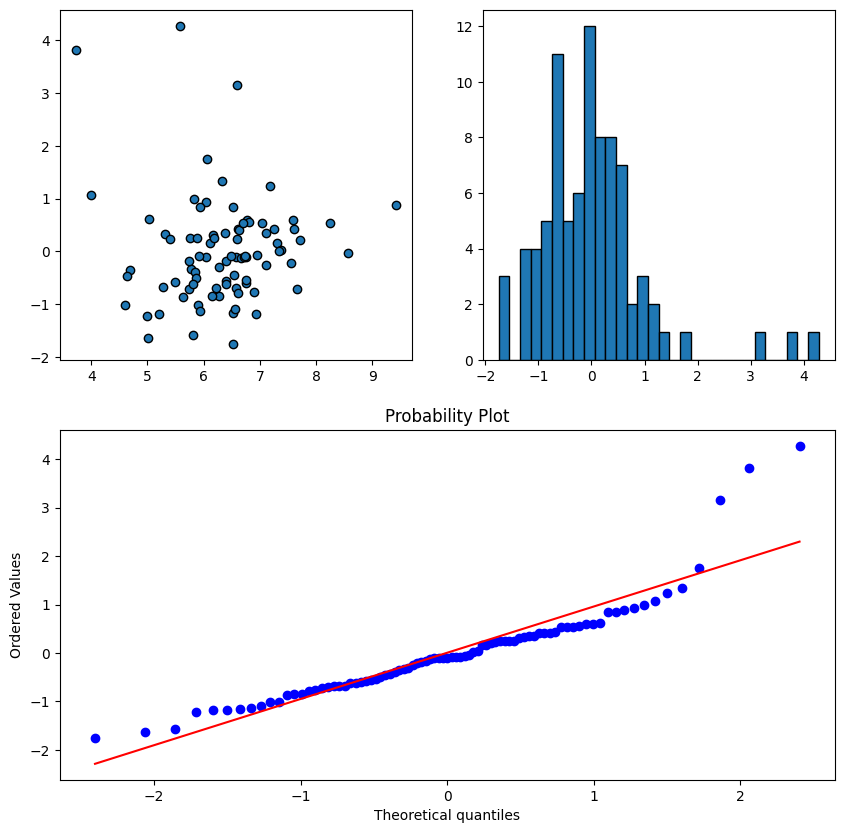

In [ ]:
# для модели 2
fig = plt.figure(num = 2, figsize = (10, 10))

# Графически ищем гетероскедастичность:
influence = model2.get_influence()
st_residuals_lin = influence.resid_studentized_internal

# Диаграмма рассеяния остатков относительно
ax = fig.add_subplot(2, 2, 1)
ax.plot(model2.fittedvalues, st_residuals_lin, linestyle = "None", marker = "o", markeredgecolor = "black")
# Гистограмма остатков
ax = fig.add_subplot(2, 2, 2)
ax.hist(st_residuals_lin, bins = 30, edgecolor = "black")
# График остатков: Q-Q:
ax = fig.add_subplot(2, 1, 2)
stats.probplot(st_residuals_lin, dist = "norm", plot = ax)

plt.show()

In [ ]:
# H0: гомоскедастичность
name = ['LM statistic', 'LM p-value', 'F-value', 'F  p-value']
bp_test = sm_diagnostic.het_breuschpagan(resid = model2.resid, exog_het = sm.add_constant(X2))
print(pd.DataFrame([np.round(bp_test, 3)], columns=name))

   LM statistic  LM p-value  F-value  F  p-value
0          9.25        0.01    5.007       0.009


In [ ]:
# H0: нормальность остатков
norm_tests = ["Anderson-Darling",
              "Kolmogorov-Smirnov",
              "Jarque-Bera"]
norm_test = pd.DataFrame()
norm_test["p_value"] = [
    sm_diagnostic.normal_ad(x = model2.resid)[1],
    sm_diagnostic.kstest_normal(x = model2.resid, dist = "norm")[1],
    sm_tools.jarque_bera(model2.resid)[1]
]
norm_test["Test"] = norm_tests
print(norm_test)

        p_value                Test
0  3.195968e-05    Anderson-Darling
1  1.798794e-03  Kolmogorov-Smirnov
2  3.224465e-29         Jarque-Bera


In [ ]:
#VIF-тест
pd.Series([vif(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

ВС2     4.417584
ЧПО2    4.417584
dtype: float64

In [ ]:
#Тест Бройша-Пагана.(определение гетероскедостичности/гомоскедостичности) ,H0->гомоскедостичность,
#H1-> гомоскедостичность отсутствует.=> гетероскедостичность.
#если p > 0,05 , то H0 не отвергаем
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
test = sms.het_breuschpagan(resid=model2.resid,exog_het=sm.add_constant(X2))
names= ['Lagrange multiplier statistic','p-value','f-value ','f p-value']
lzip(names,test)
#1.Lagrange multiplier statistic
#2.p-value
#3.f-vulue
#4.f p-value

[('Lagrange multiplier statistic', 9.250237373243884),
 ('p-value', 0.009802491542169871),
 ('f-value ', 5.006744828650306),
 ('f p-value', 0.008880887568340462)]

# Общие результаты

In [ ]:
Stargazer([model_est, model1_est,model2_est])

In [ ]:
data1 = pd.read_excel("/content/BEZMOSKVYekonometrika_dannye_17_12_23_konechny_variant.xlsx")
data1.head()

,Unnamed: 0,ВРП,ИОК,НИОКР,УЗН,З1000,СЧН,РДН,Н,ОРТ,...,СИОКЗ,ВЮФЛ,ИППТ,ЗИДО,СЭ,ИТГП,ЖФ,ЧПО,ООЭД,ОКУ
0,Белгородская область,956.0,167367,2631.6,80.5,694.5,1548.3,100.6,123934.4,357195,...,33.9,241282,2536,30653.0,1620.6,100.2,50,33161,513.5,19994
1,Брянская область,397.7,63944,666.1,77.9,760.4,1196.3,100.5,53930.2,270155,...,36.8,114128,2064,2200.8,-425.4,103.8,36,17980,167.1,14932
2,Владимирская область,537.4,90085,5496.6,81.8,895.2,1362.1,101.9,84710.5,238711,...,34.9,192945,7640,14058.5,-821.6,100.3,41,29742,461.0,20666
3,Воронежская область,1002.6,298024,9656.5,78.0,524.5,2326.0,101.1,128249.4,585880,...,47.9,368532,2795,22435.0,386.9,103.6,72,49434,359.0,30861
4,Ивановская область,249.8,37992,865.6,80.0,931.1,1000.7,99.5,33519.3,178635,...,28.5,119972,1161,195.3,-109.3,101.1,27,27603,92.7,13950


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data1['СДДНМ2']=np.log(data1['СДДНМ'])
data1.head()
data1['ОКУ2']=np.log(data1['ОКУ'])
data1.head()
Y=data1['ВРП']
X=data1[['ГАТ','ОКУ','ОГЖ','РДН']]
model0=sm.OLS(Y,sm.add_constant(X)).fit()
print(model0.summary())

In [ ]:
# для линейной модели
fig = plt.figure(num = 2, figsize = (10, 10))

# Графически ищем гетероскедастичность:
influence = model0.get_influence()
st_residuals_lin = influence.resid_studentized_internal

# Диаграмма рассеяния остатков относительно
ax = fig.add_subplot(2, 2, 1)
ax.plot(model0.fittedvalues, st_residuals_lin, linestyle = "None", marker = "o", markeredgecolor = "black")
# Гистограмма остатков
ax = fig.add_subplot(2, 2, 2)
ax.hist(st_residuals_lin, bins = 30, edgecolor = "black")
# График остатков: Q-Q:
ax = fig.add_subplot(2, 1, 2)
stats.probplot(st_residuals_lin, dist = "norm", plot = ax)

plt.show()

In [ ]:
# H0: гомоскедастичность
name = ['LM statistic', 'LM p-value', 'F-value', 'F  p-value']
bp_test = sm_diagnostic.het_breuschpagan(resid = model0.resid, exog_het = sm.add_constant(X))
print(pd.DataFrame([np.round(bp_test, 3)], columns=name))

   LM statistic  LM p-value  F-value  F  p-value
0         7.307       0.121    1.882       0.122


In [ ]:
# H0: нормальность остатков
norm_tests = ["Anderson-Darling",
              "Kolmogorov-Smirnov",
              "Jarque-Bera"]

In [ ]:
norm_test = pd.DataFrame()
norm_test["p_value"] = [
    sm_diagnostic.normal_ad(x = model0.resid)[1],
    sm_diagnostic.kstest_normal(x = model0.resid, dist = "norm")[1],
    sm_tools.jarque_bera(model0.resid)[1]
]
norm_test["Test"] = norm_tests
print(norm_test)

         p_value                Test
0   2.093656e-18    Anderson-Darling
1   1.000000e-03  Kolmogorov-Smirnov
2  8.424357e-205         Jarque-Bera


In [ ]:
#VIF-тест
pd.Series([vif(X.values, i) for i in range(X.shape[1])], index=X.columns)

ГАТ    5.397511
ОКУ    4.896265
ОГЖ    1.067742
РДН    2.105009
dtype: float64

In [ ]:
#Тест Бройша-Пагана.(определение гетероскедостичности/гомоскедостичности) ,H0->гомоскедостичность,
#H1-> гомоскедостичность отсутствует.=> гетероскедостичность.
#если p > 0,05 , то H0 не отвергаем
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
test = sms.het_breuschpagan(resid=model0.resid,exog_het=sm.add_constant(X))
names= ['Lagrange multiplier statistic','p-value','f-value ','f p-value']
lzip(names,test)
#1.Lagrange multiplier statistic
#2.p-value
#3.f-vulue
#4.f p-value

In [ ]:
#Тестирование на пропущенную нелинейность(Тест Рейнбоу)
data_rain = data.iloc[np.argsort(data["ГАТ"]), :]
factors_rain = data_rain[['ГАТ','ОКУ','ОГЖ','РДН']]
wage_rain = data_rain['ВРП']

res_rain = sm.OLS(wage_rain, factors_rain).fit()
rain_t1 = sm_diagnostic.linear_rainbow(res_rain)
print(pd.DataFrame(rain_t1, index = ["F-stat", "p-value"]).T)

      F-stat       p-value
0  11.166081  6.014400e-12


In [ ]:
#Тестирование на пропущенную нелинейность
factors_nosq = data[['ГАТ','ОКУ','ОГЖ']]

wage = data['ВРП']
res_nosq = sm.OLS(wage, factors_nosq).fit()

reset_t2 = oi.reset_ramsey(res_nosq, degree = 2)
print(reset_t2)

<F test: F=42.198948702535105, p=6.216372227303423e-09, df_denom=81, df_num=1>
